Merged. A lot of trials * 2 audio files.

Algorithm: neural pattern matching.

Number of subjects: 2.

Result: r=0.523.

File format: waveform; --original--recon--orig--recon--orig--recon--....

In [1]:
from dSPEECH.config import *
import matplotlib.pyplot as plt
import librosa

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [2]:
folder=data_dir+'evaluation_matrix/dataset3/'
files=['jneabbfefsuppdata2.wav','jneabbfefsuppdata3.wav']
audio0,sf=librosa.load(folder+files[0])
audio1,sf=librosa.load(folder+files[1])

In [26]:
import soundfile

export=audio0[:int(len(audio0)/8+1*sf)]
soundfile.write(folder+'exported.wav', export, sf)

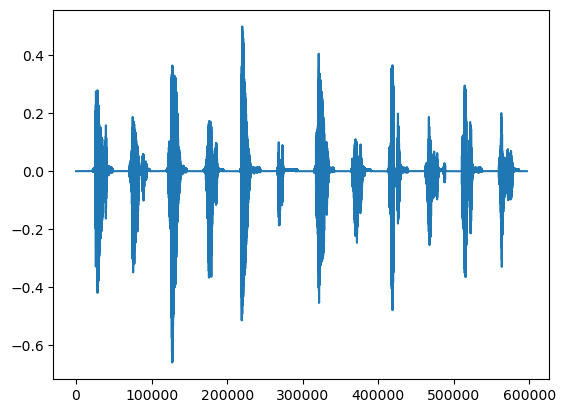

In [27]:
%matplotlib inline
audio,sf=librosa.load(folder+'exported.wav')
#audio=audio[:-49976]
plt.plot(audio)

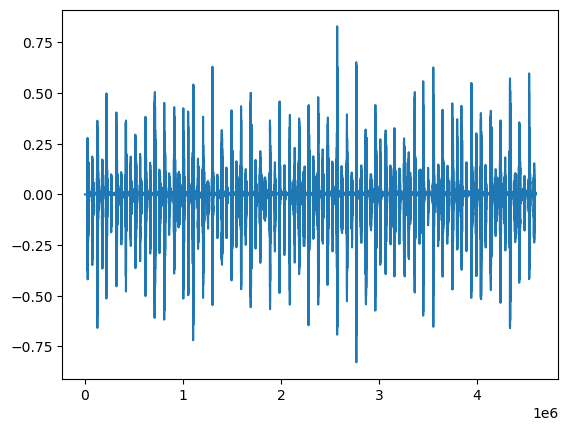

In [9]:
plt.plot(audio0)

Manually identify the beginning of pred and target trials using Audacity.

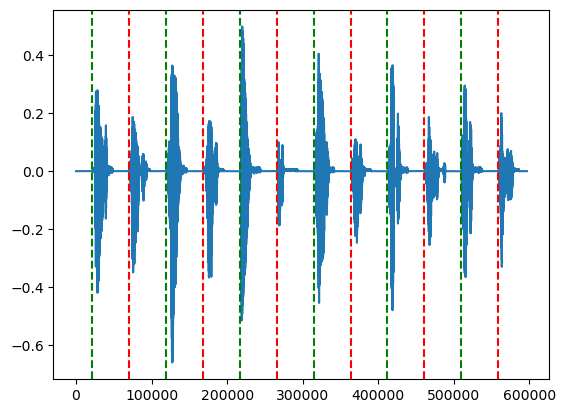

In [30]:
starts_target=[0.965,5.405,9.824,14.264,18.684,23.118,]
starts_pred=[3.184,7.620,12.044,16.478,20.905,25.340]
trial_len=int(1.65*sf) #s
fig,ax=plt.subplots()
ax.plot(audio)
for i in range(len(starts_pred)):
    ax.axvline(x=int(starts_target[i]*sf), color='green', linestyle='--')
    ax.axvline(x=int(starts_pred[i]*sf), color='red', linestyle='--')

In [32]:
trial_len=int(1.65*sf) #s
for i in range(len(starts_pred)):
    tmp1=audio[int(starts_target[i]*sf):int(starts_target[i]*sf)+trial_len]
    soundfile.write(folder+'target_trial_'+str(i)+'.wav', tmp1, sf)
    
    tmp2=audio[int(starts_pred[i]*sf):int(starts_pred[i]*sf)+trial_len]
    soundfile.write(folder+'pred_trial_'+str(i)+'.wav', tmp2, sf)
    


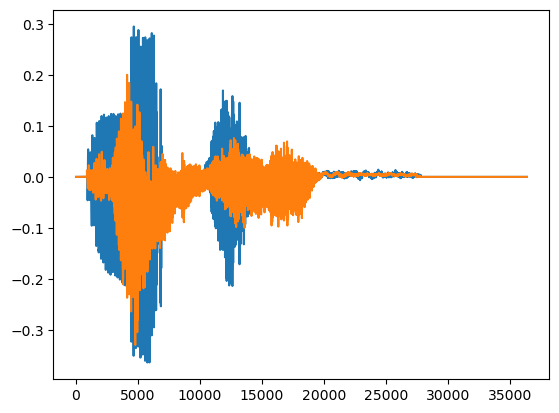

In [33]:
plt.plot(tmp1)
plt.plot(tmp2)